# <font color=dark> Uber Reviews Sentiment Analysis </font>

<hr style="border:2px solid gray">

## <font color=blue>Introduction</font>

### With this project using basic text sentiment analysis we will attempt to understand and interpret the relationship between the Uber reviews and Ratings, from the sample data provided. The sentiment analysis and prediction is done using ensemble methods (Countvectorizer & TF/IDF) model of Bag-of-Words and Logistic regression.

<hr style="border:2px solid gray">

## <font color=blue>Table of Contents</font>
### 1. [Importing Libraries and Sample Data](#Importing-Libraries-and-Sample-Data)
### 2. [Data Pre-Processing](#Data-Pre-Processing)
### 3. [Basic Text & Sentiment Analysis](#Basic-Text-&-Sentiment-Analysis)
### 4. [Feature Construction](#Feature-Construction)
### 5. [Supervised Learning - Countvectorizer](#Feature-Extraction-using-Countvectorizer-&-Supervised-learning-using-Logistic-Regression)
### 6. [Superivised Learning - TF/IDF](#Feature-Extraction-using-TF-IDF-vectorizer-&-Supervised-learning-using-Logistic-Regression)
### 7. [Conclusion](#Conclusion)
### 8. [Streamlit App](#Streamlit-App)


<hr style="border:2px solid gray">

## <font color=blue>Importing Libraries and Sample Data</font>

In [1]:
#Basic Libraries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import re
import numpy as np
import pandas as pd

In [2]:
#Importing plotting libraries

import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
#Importing nltk & string library

#from nltk.stem import WordNetLemmatizer
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
import string

In [4]:
# Importing sklearn library packages
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
#Importing text blob for spelling correction
from textblob import TextBlob
from spellchecker import SpellChecker
from langdetect import detect

In [6]:
df = pd.read_csv('C:/Users/jatin/Desktop/uber_reviews_itune.csv', encoding='cp1252')
df.head()

Author_Name                           Title  \
0         #NEVERUBER        Dishonest and Disgusting   
1           $$Heaven                      Free offer   
2  .Disappointed....                      Inaccurate   
3         .i. andrea                             bad   
4           -:deka:-  Double charged me for an order   

                                        Author_URL  App_Version  Rating  \
0  https://itunes.apple.com/us/reviews/id663331949  3.434.10005       1   
1  https://itunes.apple.com/us/reviews/id810421958  3.434.10005       2   
2   https://itunes.apple.com/us/reviews/id49598333  3.439.10000       2   
3  https://itunes.apple.com/us/reviews/id689880334  3.434.10005       1   
4  https://itunes.apple.com/us/reviews/id124963835  3.434.10005       1   

                                              Review              Date  
0  For half an hour, we tried EVERY UBER SERVICE ...  29-12-2020 01:14  
1  If I’m not eligible for the offer Stop floodin...  01-01-2021 23:17  
2  Consistently inaccurate Uber Eats ETA and the ...  15-01-2021 23:38  
3  i had my rides canceled back to back. they the...  08-12-2020 01:01  
4  Two of the same orders was added by accident. ...  15-12-2020 04:02

In [7]:
df.shape

(490, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Author_Name  490 non-null    object
 1   Title        490 non-null    object
 2   Author_URL   490 non-null    object
 3   App_Version  490 non-null    object
 4   Rating       490 non-null    int64 
 5   Review       490 non-null    object
 6   Date         490 non-null    object
dtypes: int64(1), object(6)
memory usage: 26.9+ KB


<hr style="border:2px solid gray">

## <font color=blue>Data Pre-Processing</font>

In [9]:
df.describe()

Rating
count  490.000000
mean     1.502041
std      1.009665
min      1.000000
25%      1.000000
50%      1.000000
75%      2.000000
max      5.000000

In [10]:
# Dropping Author Name, URL & App Version columns as we will be working on Reviews and Ratings

df = df.drop(['Author_Name', 'Author_URL', 'App_Version'], axis=1)
 
# Correcting Date-Time format

df.loc[:,'Date'] = pd.to_datetime(df['Date'], utc=True)

# Reindexing the columns

new_cols = ["Date", "Title", "Review", "Rating"]
df = df.reindex(columns = new_cols)

df

Date  \
0   2020-12-29 01:14:00+00:00   
1   2021-01-01 23:17:00+00:00   
2   2021-01-15 23:38:00+00:00   
3   2020-08-12 01:01:00+00:00   
4   2020-12-15 04:02:00+00:00   
..                        ...   
485 2021-01-16 02:39:00+00:00   
486 2020-12-23 00:15:00+00:00   
487 2020-12-16 19:10:00+00:00   
488 2020-11-25 23:06:00+00:00   
489 2020-05-12 12:19:00+00:00   

                                                 Title  \
0                             Dishonest and Disgusting   
1                                           Free offer   
2                                           Inaccurate   
3                                                  bad   
4                       Double charged me for an order   
..                                                 ...   
485                                               Uber   
486                                     Crap crap crap   
487                                   Sleeping Drivers   
488  Bad design re: offer code redemption and issue...   
489                                   I’m sick of Uber   

                                                Review  Rating  
0    For half an hour, we tried EVERY UBER SERVICE ...       1  
1    If I’m not eligible for the offer Stop floodin...       2  
2    Consistently inaccurate Uber Eats ETA and the ...       2  
3    i had my rides canceled back to back. they the...       1  
4    Two of the same orders was added by accident. ...       1  
..                                                 ...     ...  
485  Perdí mi cuenta no la puedo recuperar la use e...       5  
486  Still the same. I was forced to use it in Colo...       1  
487  It is a 30 minute commute from my household to...       1  
488  Was sent a $30 off UBer Eats. I thought about ...       1  
489  At first Uber was okay but than things started...       1  

[490 rows x 4 columns]

### Since we will be focussing on relationship of text reviews with ratings, we have dropped the columns Author Name, URL & App Version

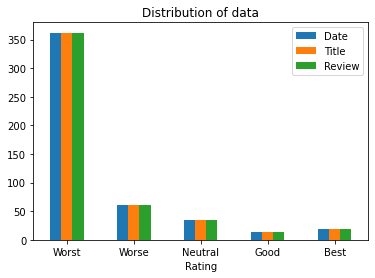

In [11]:
# Plotting the distribution of target variable i.e. Rating.

ax = df.groupby('Rating').count().plot(kind='bar', title='Distribution of data',legend=True)
ax.set_xticklabels(['Worst','Worse','Neutral','Good','Best'], rotation=0)
# Storing data in lists.

text, sentiment = list(df['Review']), list(df['Rating'])

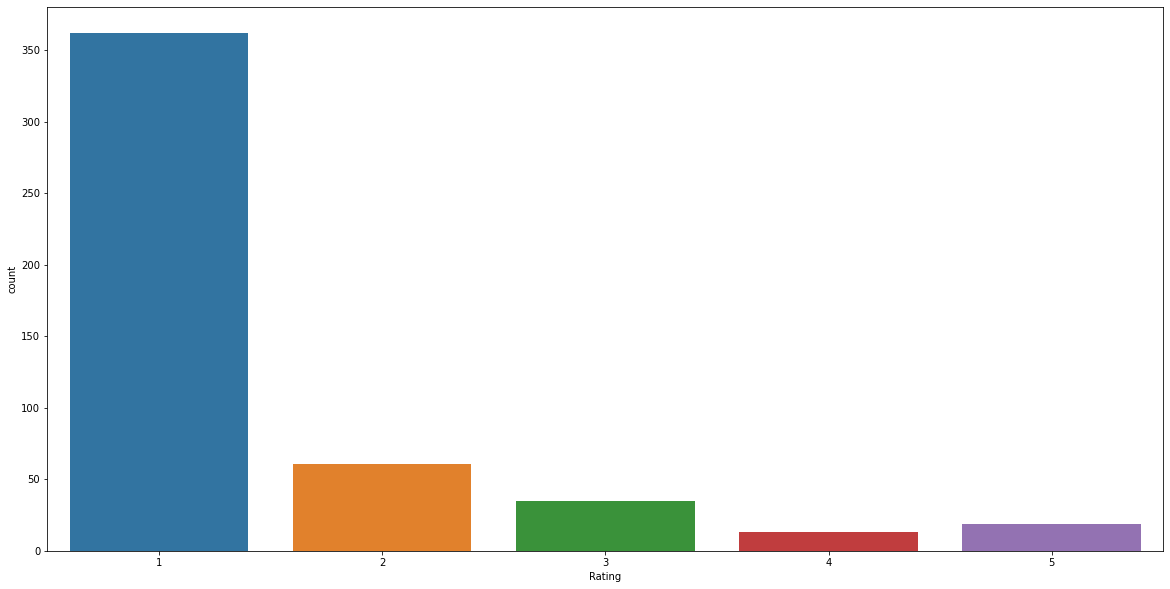

In [12]:
# basically getting outof total words how many are +ve & -ve from 'target' column
plt.figure(figsize=(20,10)) 
import seaborn as sns
sns.countplot(x='Rating', data=df)
plt.show()

### From above plot it can be observed that from the sample data most of the ratings are negative ratings, from supervised learning model point of view, the sample data is highly unbalanced.

In [13]:
#Punctuation removal function.
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"',"'"))
    return final


In [14]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [15]:
#Cleaning and removing URL’s function
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)

In [16]:
#Cleaning and removing Numerals function
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [17]:
#Cleaning and removing repeating characters function
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)

In [18]:
#Removing the square brackets function
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

In [19]:
#Removing special characters function
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

In [20]:
df['Review']=df['Review'].str.lower()
df['Title']=df['Title'].str.lower()

In [21]:
#Using above data processing functions to our Review column of dataset.
df['Review'] = df['Review'].apply(lambda x: cleaning_punctuations(x))
df['Review'] = df['Review'].apply(remove_punctuation)
df['Review'] = df['Review'].apply(lambda x: cleaning_URLs(x))
df['Review'] = df['Review'].apply(lambda x: cleaning_numbers(x))
df['Review'] = df['Review'].apply(lambda x: cleaning_repeating_char(x))
df['Review'] = df['Review'].apply(remove_between_square_brackets)
df['Review'] = df['Review'].apply(remove_special_characters)

#Using above data processing functions to our Title column of dataset.
df['Title'] = df['Title'].apply(lambda x: cleaning_punctuations(x))
df['Title'] = df['Title'].apply(remove_punctuation)
df['Title'] = df['Title'].apply(lambda x: cleaning_URLs(x))
df['Title'] = df['Title'].apply(lambda x: cleaning_numbers(x))
df['Title'] = df['Title'].apply(lambda x: cleaning_repeating_char(x))
df['Title'] = df['Title'].apply(remove_between_square_brackets)
df['Title'] = df['Title'].apply(remove_special_characters)

df.head()

Date                           Title  \
0 2020-12-29 01:14:00+00:00        dishonest and disgusting   
1 2021-01-01 23:17:00+00:00                      free offer   
2 2021-01-15 23:38:00+00:00                      inaccurate   
3 2020-08-12 01:01:00+00:00                             bad   
4 2020-12-15 04:02:00+00:00  double charged me for an order   

                                              Review  Rating  
0  for half an hour we tried every uber service t...       1  
1  if im not eligible for the offer stop flooding...       2  
2  consistently inaccurate uber eats eta and the ...       2  
3  i had my rides canceled back to back they then...       1  
4  two of the same orders was added by accident t...       1

In [22]:
df.tail()

Date  \
485 2021-01-16 02:39:00+00:00   
486 2020-12-23 00:15:00+00:00   
487 2020-12-16 19:10:00+00:00   
488 2020-11-25 23:06:00+00:00   
489 2020-05-12 12:19:00+00:00   

                                                 Title  \
485                                               uber   
486                                     crap crap crap   
487                                   sleeping drivers   
488  bad design re offer code redemption and issue ...   
489                                    im sick of uber   

                                                Review  Rating  
485  perd mi cuenta no la puedo recuperar la use el...       5  
486  still the same i was forced to use it in colom...       1  
487  it is a  minute commute from my household to m...       1  
488  was sent a  off uber eats i thought about plac...       1  
489  at first uber was okay but than things started...       1

In [23]:
#checking the languae of Review column

df['Language']=df['Review'].apply(detect)

In [24]:
#Checking the unique values in Language columnn
df.Language.nunique()

12

In [25]:
#checking the languages present in review columns
df.Language.value_counts()

en    458
es     16
pt      4
sl      2
it      2
nl      2
fr      1
no      1
so      1
cy      1
de      1
af      1
Name: Language, dtype: int64

In [26]:
#As in Review column some reviews are not in english removing those& getting it in new df
df_new = df[df.Language== 'en']

In [27]:
#correcting the spellings 
from spellchecker import SpellChecker

spell  = SpellChecker()
def spell_check(x):
    correct_word = []
    mispelled_word = x.split()
    for word in mispelled_word:
        correct_word.append(spell.correction(word))
    return ' '.join(correct_word)

df_new['Review'].apply(lambda x: spell_check(x))

0      for half an hour we tried every uber service t...
1      if im not eligible for the offer stop flooding...
2      consistently inaccurate uber eats eta and the ...
3      i had my rides canceled back to back they then...
4      two of the same orders was added by accident t...
                             ...                        
484                 i dont like your mandatory face mask
486    still the same i was forced to use it in colom...
487    it is a minute commute from my household to my...
488    was sent a off uber eats i thought about placi...
489    at first uber was okay but than things started...
Name: Review, Length: 458, dtype: object

In [28]:
#correcting the spellings 
from spellchecker import SpellChecker

spell  = SpellChecker()
def spell_check(x):
    correct_word = []
    mispelled_word = x.split()
    for word in mispelled_word:
        correct_word.append(spell.correction(word))
    return ' '.join(correct_word)

df_new['Title'].apply(lambda x: spell_check(x))

0                               dishonest and disgusting
1                                             free offer
2                                             inaccurate
3                                                    bad
4                         double charged me for an order
                             ...                        
484                               no mandatory face mask
486                                       crap crap crap
487                                     sleeping drivers
488    bad design re offer code redemption and issue ...
489                                      im sick of uber
Name: Title, Length: 458, dtype: object

In [29]:
df_new.shape

(458, 5)

In [30]:
df_new.head()

Date                           Title  \
0 2020-12-29 01:14:00+00:00        dishonest and disgusting   
1 2021-01-01 23:17:00+00:00                      free offer   
2 2021-01-15 23:38:00+00:00                      inaccurate   
3 2020-08-12 01:01:00+00:00                             bad   
4 2020-12-15 04:02:00+00:00  double charged me for an order   

                                              Review  Rating Language  
0  for half an hour we tried every uber service t...       1       en  
1  if im not eligible for the offer stop flooding...       2       en  
2  consistently inaccurate uber eats eta and the ...       2       en  
3  i had my rides canceled back to back they then...       1       en  
4  two of the same orders was added by accident t...       1       en

In [31]:
#Removing stop words function
from nltk.corpus import stopwords
stopword_list=nltk.corpus.stopwords.words('english')
STOPWORDS = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df_new['Review'] = df_new['Review'].apply(lambda text: cleaning_stopwords(text))
df_new['Title'] = df_new['Title'].apply(lambda text: cleaning_stopwords(text))

In [32]:
##Adding few more words as stopword

stopwordlistt = ['a', 'about', 'above', 'aafter','yk','yet','able','anyway', 'after', 'again', 'ain', 'all', 'am', 'an','app','and','any','are', 'as', 'at', 'be', 'because', 'been', 'before','being', 'below', 'back', 'between','both', 'by', 'can', 'd', 'did', 'do','does', 'doing', 'down','driver', 'during', 'each','few', 'for', 'from','further', 'get','had', 'has', 'have', 'having', 'he', 'her', 'here','hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'im','in','into','is', 'it', 'its', 'itself', 'ive','just', 'll', 'm', 'ma','me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once','only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'still','such','than', 'that', "thatll", 'the', 'their', 'theirs', 'them','themselves', 'then', 'there', 'these', 'they', 'this', 'those','through', 'to', 'too','uber','under', 'until', 'up', 've', 'very','want', 'was','we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom','why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre","youve", 'your', 'yours', 'yourself', 'yourselves','hasnt','wants']  

In [33]:
STOPWORDS = set(stopwordlistt)
def cleaning_stopwordss(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df_new['Review'] = df_new['Review'].apply(lambda text: cleaning_stopwordss(text))
df_new['Title'] = df_new['Title'].apply(lambda text: cleaning_stopwordss(text))
df_new.head()

Date                 Title  \
0 2020-12-29 01:14:00+00:00  dishonest disgusting   
1 2021-01-01 23:17:00+00:00            free offer   
2 2021-01-15 23:38:00+00:00            inaccurate   
3 2020-08-12 01:01:00+00:00                   bad   
4 2020-12-15 04:02:00+00:00  double charged order   

                                              Review  Rating Language  
0  half hour tried every service take short trip ...       1       en  
1  eligible offer stop flooding email false infor...       2       en  
2  consistently inaccurate eats eta food menus of...       2       en  
3  rides canceled charged account cancellation fe...       1       en  
4  two orders added accident restaurant tried rem...       1       en

### To summarize, under data pre-processing applied to Title and Reviews columns, we have removed punctuations, url's, special characters, brackets, numerals & repeating characters, Following that we checked the columns for different unique languages, and only filtered reviews in English language for further analysis. Following that we ran spellcheck function and then, removed stopwords using NLTK library and also removing our own user defined stopwords.

<hr style="border:2px solid gray">

## <font color=blue>Basic Text & Sentiment Analysis</font>

In [34]:
#Applying Stemming
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
df_new['Review']= df_new['Review'].apply(lambda x: stemming_on_text(x))
df_new['Title']= df_new['Title'].apply(lambda x: stemming_on_text(x))
df_new.head()

Date                 Title  \
0 2020-12-29 01:14:00+00:00  dishonest disgusting   
1 2021-01-01 23:17:00+00:00            free offer   
2 2021-01-15 23:38:00+00:00            inaccurate   
3 2020-08-12 01:01:00+00:00                   bad   
4 2020-12-15 04:02:00+00:00  double charged order   

                                              Review  Rating Language  
0  half hour tried every service take short trip ...       1       en  
1  eligible offer stop flooding email false infor...       2       en  
2  consistently inaccurate eats eta food menus of...       2       en  
3  rides canceled charged account cancellation fe...       1       en  
4  two orders added accident restaurant tried rem...       1       en

In [35]:
#Applying Lemmatizer
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
df_new['Review']= df_new['Review'].apply(lambda x: lemmatizer_on_text(x))
df_new['Title']= df_new['Title'].apply(lambda x: lemmatizer_on_text(x))
df_new.head()

Date                 Title  \
0 2020-12-29 01:14:00+00:00  dishonest disgusting   
1 2021-01-01 23:17:00+00:00            free offer   
2 2021-01-15 23:38:00+00:00            inaccurate   
3 2020-08-12 01:01:00+00:00                   bad   
4 2020-12-15 04:02:00+00:00  double charged order   

                                              Review  Rating Language  
0  half hour tried every service take short trip ...       1       en  
1  eligible offer stop flooding email false infor...       2       en  
2  consistently inaccurate eats eta food menus of...       2       en  
3  rides canceled charged account cancellation fe...       1       en  
4  two orders added accident restaurant tried rem...       1       en

### Before doing preliminary analysis we have used Stemming and Lemmatization on Title & Review columns. Further we will be dividing data based on ratings, for ratings 3 & above we are considering positive reviews and below 3 negative reviews.

In [36]:
# spliting data frame into positive and negative rating sentiment, we will be including ratings with 3 as positive
positive = df_new[df_new['Rating'] >= 3]
negative = df_new[df_new['Rating'] < 3]

In [37]:
negative.head()

Date                 Title  \
0 2020-12-29 01:14:00+00:00  dishonest disgusting   
1 2021-01-01 23:17:00+00:00            free offer   
2 2021-01-15 23:38:00+00:00            inaccurate   
3 2020-08-12 01:01:00+00:00                   bad   
4 2020-12-15 04:02:00+00:00  double charged order   

                                              Review  Rating Language  
0  half hour tried every service take short trip ...       1       en  
1  eligible offer stop flooding email false infor...       2       en  
2  consistently inaccurate eats eta food menus of...       2       en  
3  rides canceled charged account cancellation fe...       1       en  
4  two orders added accident restaurant tried rem...       1       en

In [38]:
positive.head()

Date                            Title  \
7  2020-12-24 21:01:00+00:00                                    
14 2020-12-19 03:06:00+00:00                              pet   
24 2020-12-28 00:17:00+00:00  takes drunk friends home nicely   
29 2020-12-14 16:09:00+00:00                          service   
32 2020-12-19 15:46:00+00:00                   transportation   

                                               Review  Rating Language  
7   good times find drivers gps always miss turns ...       3       en  
14  half time drivers accept ride pet refuse pick ...       3       en  
24  whenever friends go need rides home lit end ni...       5       en  
29  live north dakota need buy stuff people miami ...       5       en  
32  rely uberas transportation work good double ch...       3       en

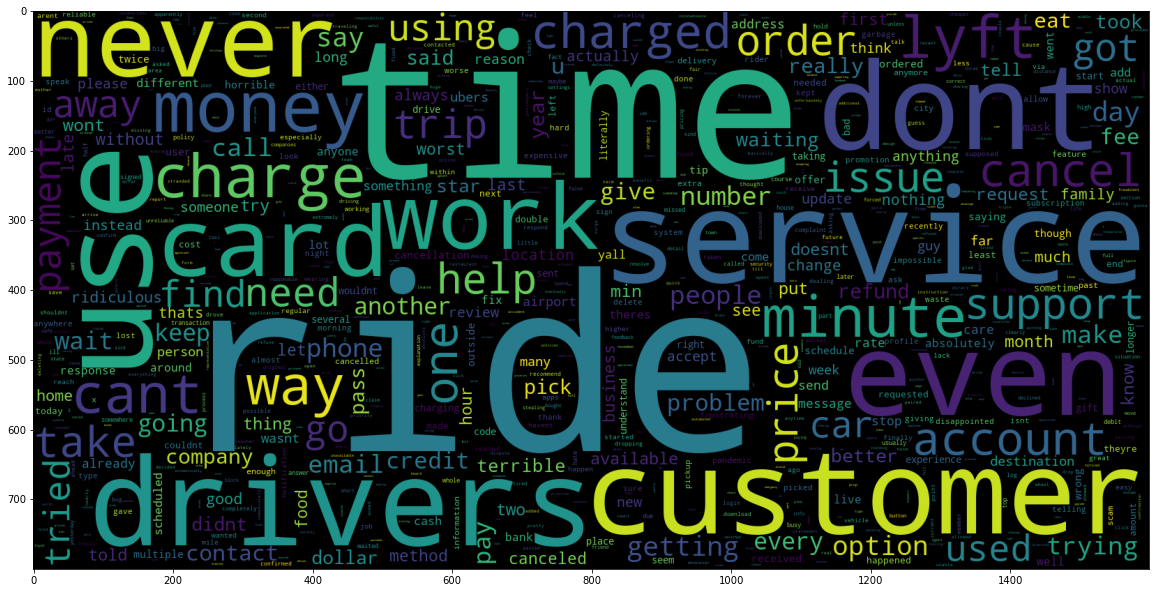

In [39]:
# Wordcloud for negative rating reviews
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(negative.Review))
plt.imshow(wc)
plt.show()

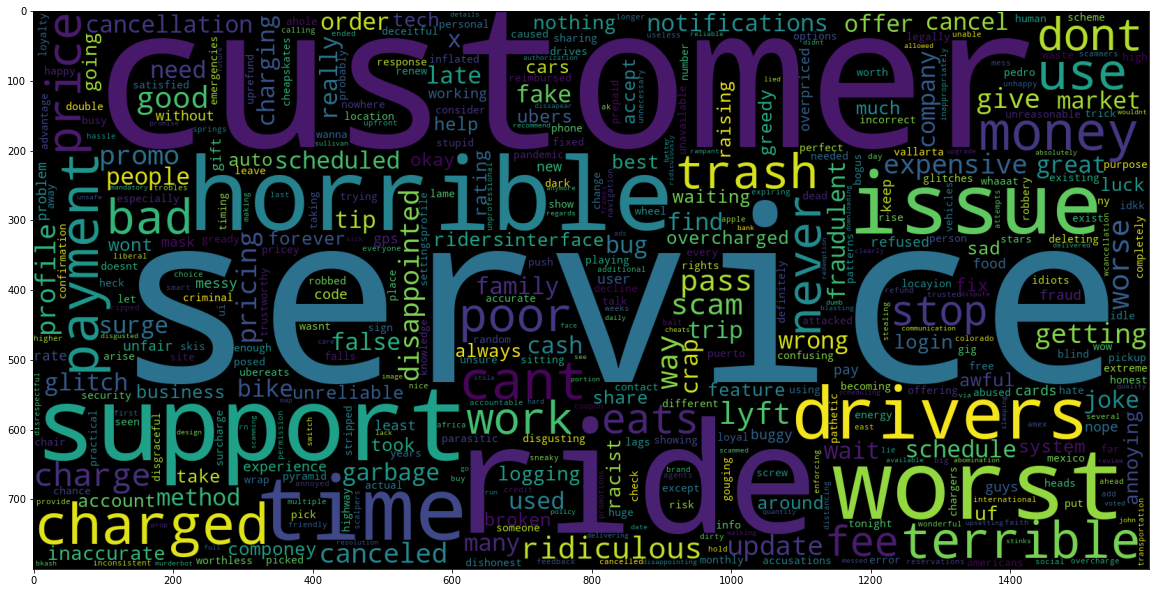

In [40]:
# Wordcloud for negative rating title
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(negative.Title))
plt.imshow(wc)
plt.show()

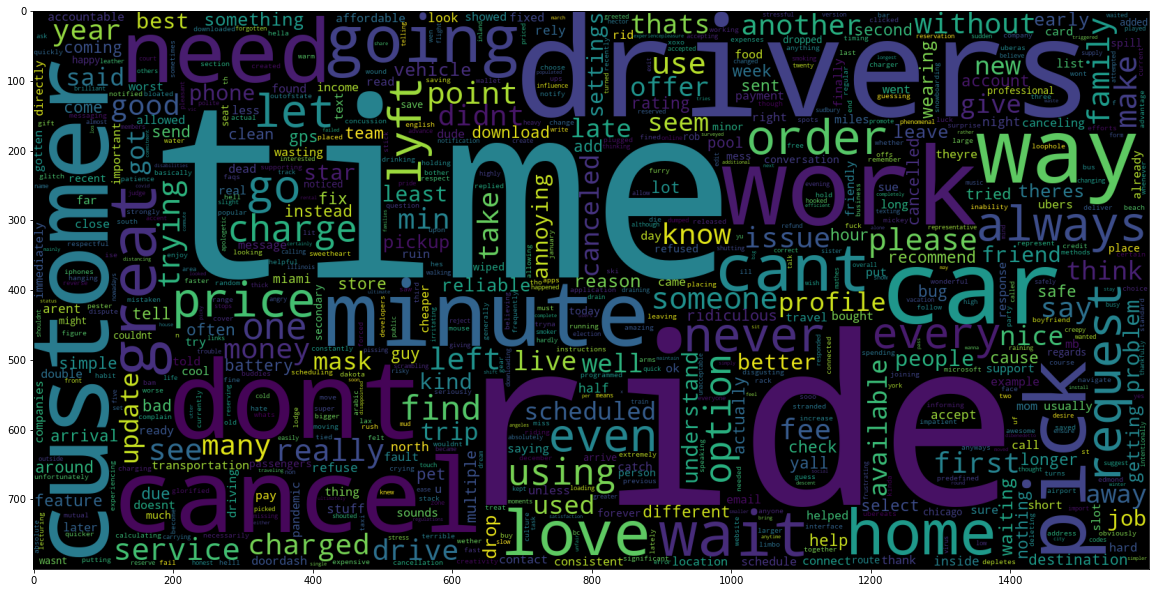

In [41]:
# Wordcloud for positive rating reviews
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(positive.Review))
plt.imshow(wc)
plt.show()

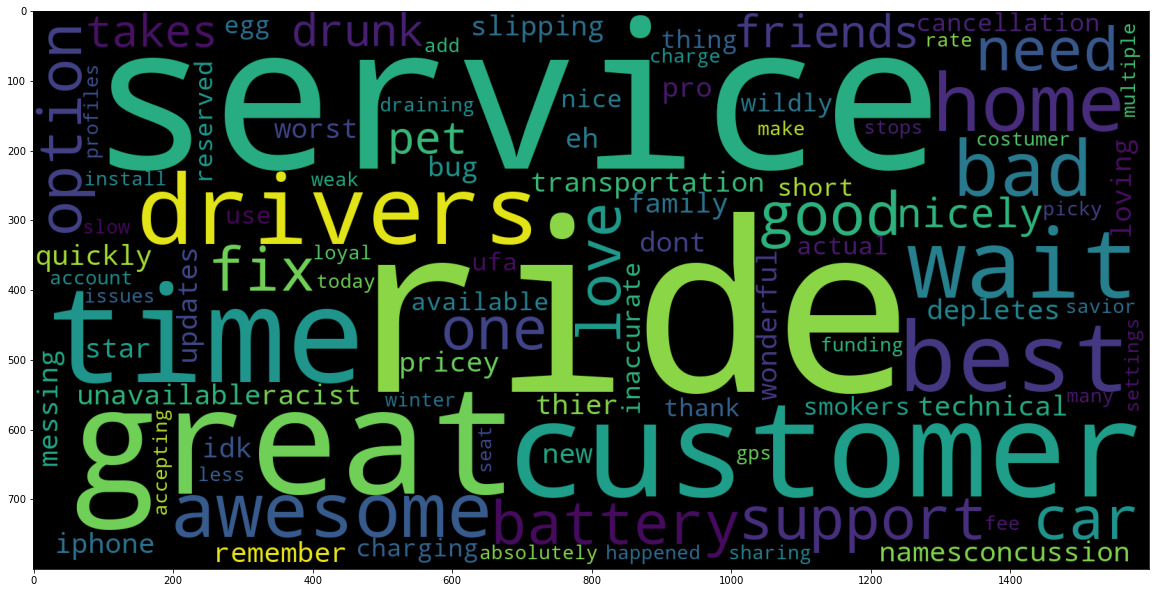

In [42]:
# Wordcloud for positive rating title
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(positive.Title))
plt.imshow(wc)
plt.show()

### Based on the wordclouds of Title & Reviews for positive ratings (3 & above) and negative ratings (below 3) we see that the most common words used in negative reviews are 'Service', 'Time', 'Customer', 'Charge', 'Ride' and the most common words in positive reviews are 'Service', 'Ride', 'Time', 'Home'.
### By looking at this info we can assume that factors largely influencing Positive and Negative reviews are Customer Service, Ride & Time.

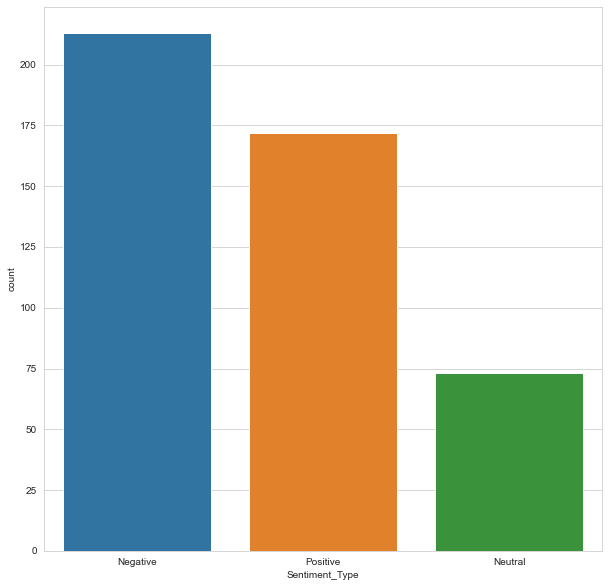

In [43]:
# Positive & Negative Sentiments segregation of Reviews using TextBlob

bloblist_desc = list()

uber_descr_str=df_new['Review'].astype(str)
for row in uber_descr_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    uber_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
 
def f(uber_polarity_desc):
    if uber_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif uber_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

uber_polarity_desc['Sentiment_Type'] = uber_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=uber_polarity_desc)


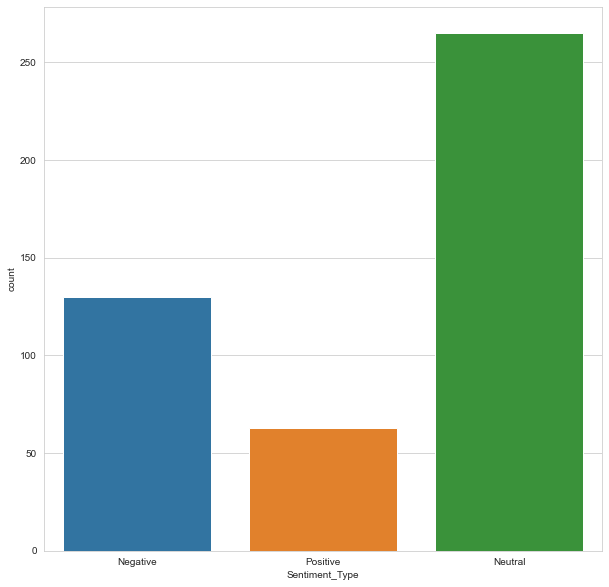

In [44]:
# Positive & Negative Sentiments segregation of Title using TextBlob

bloblist_desc = list()

uber_descr_str=df_new['Title'].astype(str)
for row in uber_descr_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    uber_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
 
def f(uber_polarity_desc):
    if uber_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif uber_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

uber_polarity_desc['Sentiment_Type'] = uber_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=uber_polarity_desc)


<hr style="border:2px solid gray">

## <font color=blue>Feature Construction</font>

### For further analysis we will be conctructing a column 'Weekday' and would compare ratings with days of week.

In [45]:
# Adding a column for weekday

df_new.loc[:, 'Weekday'] = pd.Series(df_new.Date).dt.day_name()
df_new

Date  \
0   2020-12-29 01:14:00+00:00   
1   2021-01-01 23:17:00+00:00   
2   2021-01-15 23:38:00+00:00   
3   2020-08-12 01:01:00+00:00   
4   2020-12-15 04:02:00+00:00   
..                        ...   
484 2020-11-12 17:44:00+00:00   
486 2020-12-23 00:15:00+00:00   
487 2020-12-16 19:10:00+00:00   
488 2020-11-25 23:06:00+00:00   
489 2020-05-12 12:19:00+00:00   

                                                 Title  \
0                                 dishonest disgusting   
1                                           free offer   
2                                           inaccurate   
3                                                  bad   
4                                 double charged order   
..                                                 ...   
484                                mandatory face mask   
486                                     crap crap crap   
487                                   sleeping drivers   
488  bad design offer code redemption issue resolution   
489                                               sick   

                                                Review  Rating Language  \
0    half hour tried every service take short trip ...       1       en   
1    eligible offer stop flooding email false infor...       2       en   
2    consistently inaccurate eats eta food menus of...       2       en   
3    rides canceled charged account cancellation fe...       1       en   
4    two orders added accident restaurant tried rem...       1       en   
..                                                 ...     ...      ...   
484                      dont like mandatory face mask       1       en   
486  forced use colombia since know ride sharing ap...       1       en   
487  minute commute household worksite tend use tim...       1       en   
488  sent eats thought placing order applied code c...       1       en   
489  first okay things started happening like drive...       1       en   

       Weekday  
0      Tuesday  
1       Friday  
2       Friday  
3    Wednesday  
4      Tuesday  
..         ...  
484   Thursday  
486  Wednesday  
487  Wednesday  
488  Wednesday  
489    Tuesday  

[458 rows x 6 columns]

In [46]:
# Positive Ratings compared to Weekdays

p_uber = df_new[df_new.Rating > 3]
p_uber.head()

Date                                Title  \
24  2020-12-28 00:17:00+00:00      takes drunk friends home nicely   
29  2020-12-14 16:09:00+00:00                              service   
77  2020-12-24 20:47:00+00:00                        worst drivers   
102 2020-08-12 11:18:00+00:00  dont remember thier namesconcussion   
150 2020-11-12 23:26:00+00:00                              updates   

                                                Review  Rating Language  \
24   whenever friends go need rides home lit end ni...       5       en   
29   live north dakota need buy stuff people miami ...       5       en   
77   left star cause obviously ubers fault drivers ...       4       en   
102  nice respectful helped figure sounds simple co...       5       en   
150  updates sooo bloated well mb every time lyft l...       4       en   

       Weekday  
24      Monday  
29      Monday  
77    Thursday  
102  Wednesday  
150   Thursday

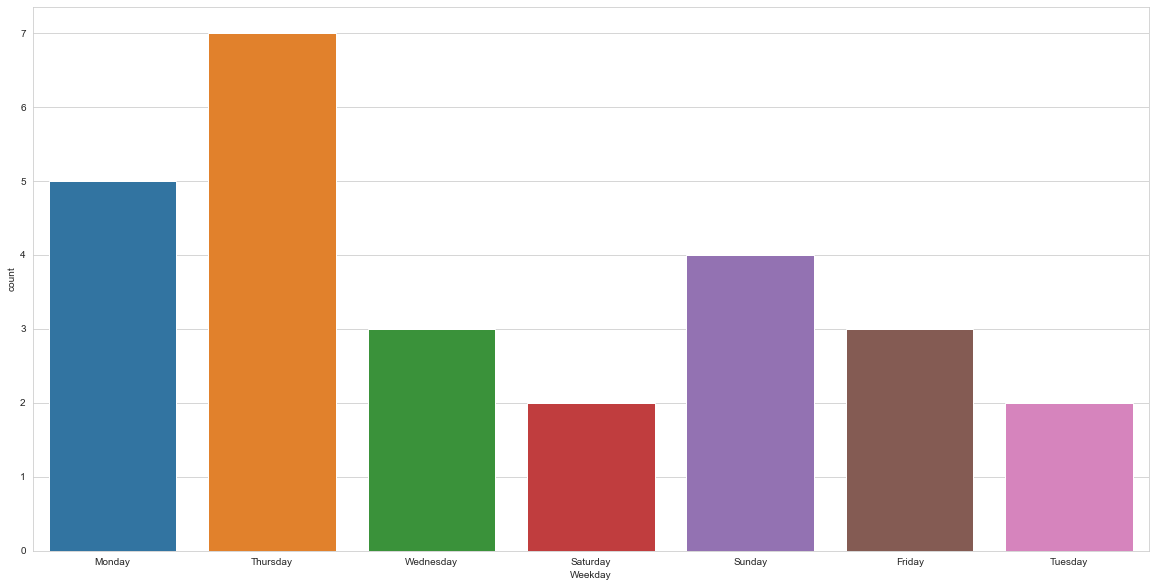

In [47]:
plt.figure(figsize=(20,10))
sns.countplot(x='Weekday', data=p_uber)
plt.show()

In [48]:
# Negative Ratings compared to Weekdays

n_uber = df_new[df_new.Rating < 3]
n_uber.head()

Date                 Title  \
0 2020-12-29 01:14:00+00:00  dishonest disgusting   
1 2021-01-01 23:17:00+00:00            free offer   
2 2021-01-15 23:38:00+00:00            inaccurate   
3 2020-08-12 01:01:00+00:00                   bad   
4 2020-12-15 04:02:00+00:00  double charged order   

                                              Review  Rating Language  \
0  half hour tried every service take short trip ...       1       en   
1  eligible offer stop flooding email false infor...       2       en   
2  consistently inaccurate eats eta food menus of...       2       en   
3  rides canceled charged account cancellation fe...       1       en   
4  two orders added accident restaurant tried rem...       1       en   

     Weekday  
0    Tuesday  
1     Friday  
2     Friday  
3  Wednesday  
4    Tuesday

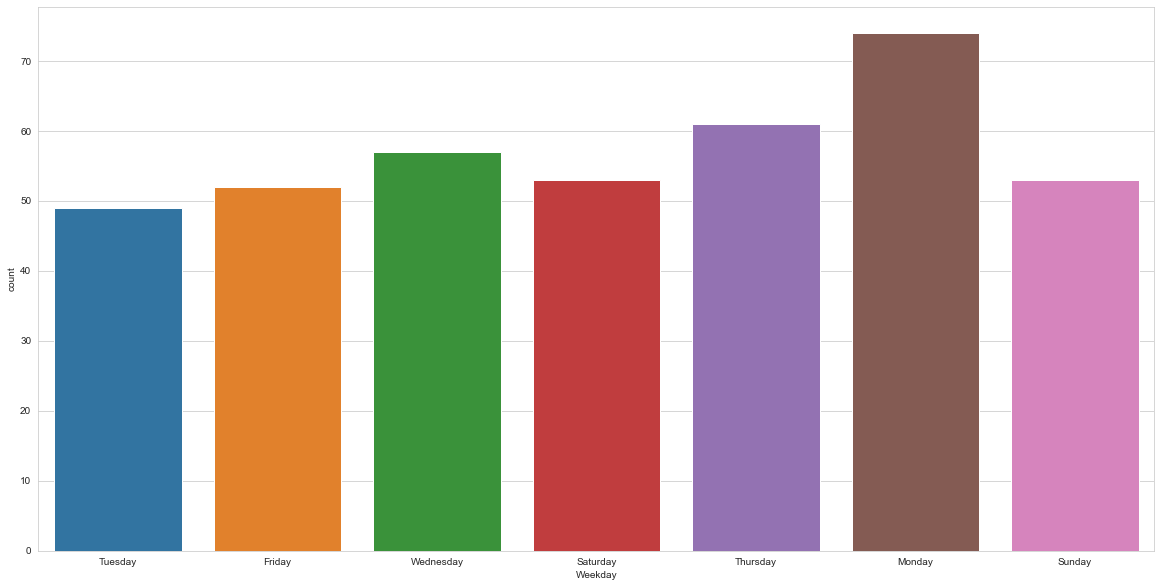

In [49]:
plt.figure(figsize=(20,10))
sns.countplot(x='Weekday', data=n_uber)
plt.show()

### On Observing above data it is evident that most positive ratings received are on Thursdays and most Negative ratings received are on Mondays. Monday is genrally rush hour day as everyone is back to work after weekend and hence, during the high rush days the service tends to drop, and thus, receive negative ratings.

<hr style="border:2px solid gray">

## <font color=blue>Feature Extraction using Countvectorizer & Supervised learning using Logistic Regression</font>

### Under this we would use countvecorizer to create a Bag-of-words and then apply Logistic regression. 
### In order to perform Logistics regression, we are converting Ratings into a binary output under column 'Rating_binary'. If the Ratings are 3 & above, the value is 1 else the value is 0.

In [50]:
#creating new binary column based on Rating
df_new['Rating_binary'] = np.where(df_new['Rating'] >= 3, 1, 0)
df_new

Date  \
0   2020-12-29 01:14:00+00:00   
1   2021-01-01 23:17:00+00:00   
2   2021-01-15 23:38:00+00:00   
3   2020-08-12 01:01:00+00:00   
4   2020-12-15 04:02:00+00:00   
..                        ...   
484 2020-11-12 17:44:00+00:00   
486 2020-12-23 00:15:00+00:00   
487 2020-12-16 19:10:00+00:00   
488 2020-11-25 23:06:00+00:00   
489 2020-05-12 12:19:00+00:00   

                                                 Title  \
0                                 dishonest disgusting   
1                                           free offer   
2                                           inaccurate   
3                                                  bad   
4                                 double charged order   
..                                                 ...   
484                                mandatory face mask   
486                                     crap crap crap   
487                                   sleeping drivers   
488  bad design offer code redemption issue resolution   
489                                               sick   

                                                Review  Rating Language  \
0    half hour tried every service take short trip ...       1       en   
1    eligible offer stop flooding email false infor...       2       en   
2    consistently inaccurate eats eta food menus of...       2       en   
3    rides canceled charged account cancellation fe...       1       en   
4    two orders added accident restaurant tried rem...       1       en   
..                                                 ...     ...      ...   
484                      dont like mandatory face mask       1       en   
486  forced use colombia since know ride sharing ap...       1       en   
487  minute commute household worksite tend use tim...       1       en   
488  sent eats thought placing order applied code c...       1       en   
489  first okay things started happening like drive...       1       en   

       Weekday  Rating_binary  
0      Tuesday              0  
1       Friday              0  
2       Friday              0  
3    Wednesday              0  
4      Tuesday              0  
..         ...            ...  
484   Thursday              0  
486  Wednesday              0  
487  Wednesday              0  
488  Wednesday              0  
489    Tuesday              0  

[458 rows x 7 columns]

In [51]:
#splitting into train and test

X_train, X_test, y_train, y_test = train_test_split(df_new['Review']+df_new['Title'], df_new['Rating_binary'], test_size = 0.20, random_state =1000)

#printing random training text and X_train shape

print(X_train)
print(' ')
print('X_train shape: ' + str(X_train.shape))

193    rely work every morning matter matter early or...
176    time difference mins continue showing wrong ti...
345    use use anywhere go used cheaper lyft used sub...
15     really hard find phone number talk someone som...
382    waiting move destination long time canceled al...
                             ...                        
267    love lately saying cars available sure glitch ...
202    charging monthly stop auto renewal charging am...
74     enough drivers took forever assigned move minu...
91     tried two hours find two popped either took ri...
463    literally worst customer support experience ev...
Length: 366, dtype: object
 
X_train shape: (366,)


In [52]:
#creating variable which assigns X_train to numbers

vect = CountVectorizer().fit(X_train)

#translates numbers back to text

vect.get_feature_names()[1:10]

['absolute',
 'absolutely',
 'abused',
 'accent',
 'accept',
 'acceptable',
 'accepted',
 'accepting',
 'accepts']

In [53]:
#length of total words

len(vect.get_feature_names())

2730

In [54]:
#creating matrix array for logistic regression

X_train_vectorized = vect.transform(X_train)
print (X_train_vectorized.toarray())

[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


In [55]:
#creating log regression

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

LogisticRegression()

In [56]:
#calculating AUC

from sklearn.metrics import roc_auc_score

predictions = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.55


In [57]:
#creating array variable of all the words
feature_names = np.array(vect.get_feature_names())

#creating array of all the regression coefficients per word
coef_index = model.coef_[0]

#creating dataframe with both arrays in it
df1 = pd.DataFrame({'Word':feature_names, 'Coef': coef_index})

#sorting by coefficient
df1.sort_values('Coef')

Word      Coef
2106    service -0.647505
2566        use -0.529370
347        card -0.483238
1350       lyft -0.469448
2469       trip -0.449836
...         ...       ...
90       always  0.755681
563   customers  0.821908
228     battery  0.823807
1008      great  1.154071
1340       love  1.487712

[2730 rows x 2 columns]

In [58]:
# Negative Word Sentiment Data frame

neg = df1[df1.Coef < 0]
neg.sort_values('Coef')

Word      Coef
2106      service -0.647505
2566          use -0.529370
347          card -0.483238
1350         lyft -0.469448
2469         trip -0.449836
...           ...       ...
683        donate -0.000005
2497   ubercalled -0.000005
1743  practically -0.000005
1459  moneylonger -0.000005
1192     internet -0.000005

[2123 rows x 2 columns]

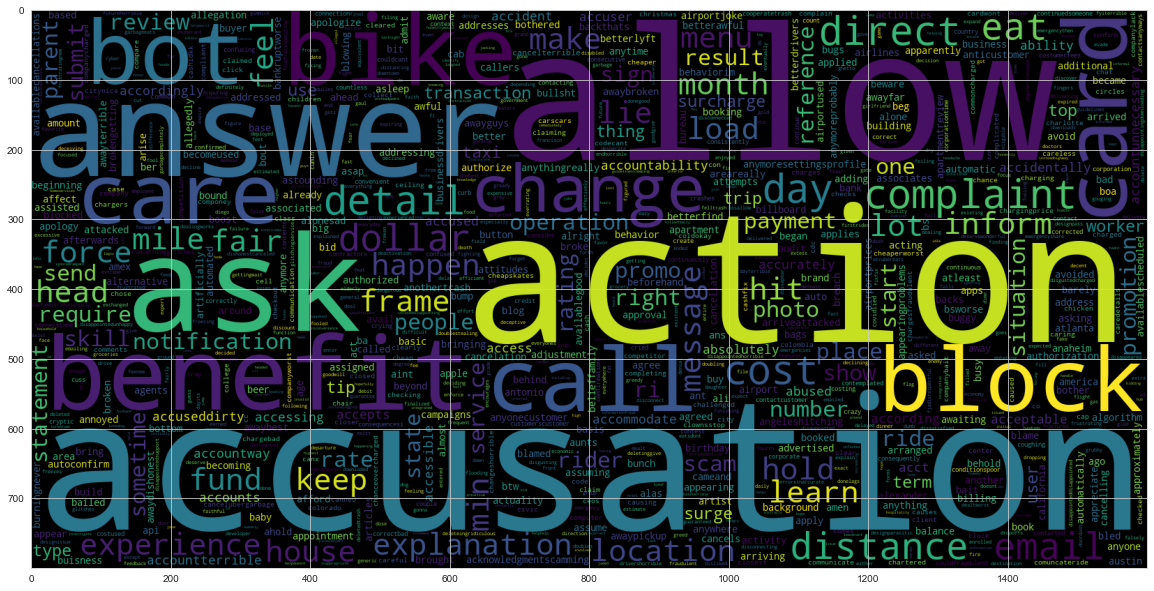

In [59]:
# Wordcloud for negative coefficient words

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(neg.Word))
plt.imshow(wc)
plt.show()

In [61]:
# Positive Word Sentiment Data frame

pos = df1[df1.Coef > 0]
pos.sort_values('Coef', ascending=False)

Word      Coef
1340       love  1.487712
1008      great  1.154071
228     battery  0.823807
563   customers  0.821908
90       always  0.755681
...         ...       ...
983      giving  0.003824
2066   schedule  0.002970
1269       less  0.002344
2681    without  0.002119
2691    working  0.001472

[607 rows x 2 columns]

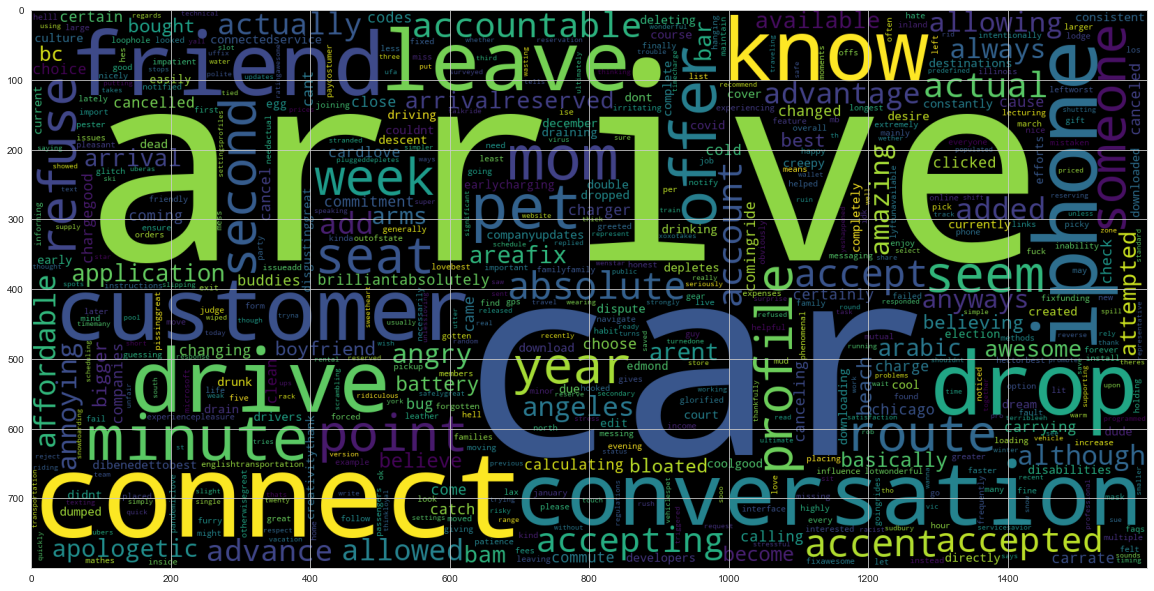

In [62]:
# Wordcloud for positive coefficient words

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(pos.Word))
plt.imshow(wc)
plt.show()

# 

## Testing Custom Reviews by above model

In [63]:
print(model.predict(vect.transform(['arrive on time'])))
print(model.predict(vect.transform(['customer care'])))
print(model.predict(vect.transform(['charged slow horrible'])))
print(model.predict(vect.transform(['Yes accepting'])))

[0]
[0]
[0]
[0]


<hr style="border:2px solid gray">

## <font color=blue>Feature Extraction using TF-IDF vectorizer & Supervised learning using Logistic Regression</font>

### Under this we would use TF-IDF to create a Bag-of-words and then apply Logistic regression.

In [64]:
#making the variable to test & train
# Separating the 80% data for training data and 20% for testing data

X_train, X_test, y_train, y_test = train_test_split(df_new['Review']+df_new['Title'], df_new['Rating_binary'],test_size = 0.20, random_state =1000)

In [65]:
#Transforming Dataset using TF-IDF Vectorizer
#removing terms 
#tfidf_vectorizer = TfidfVectorizer(stop_words = 'english)
vectoriser = TfidfVectorizer(ngram_range=(1,2))
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))
print('\n\n',vectoriser.get_feature_names())

No. of feature_words:  12113


 ['ability', 'ability address', 'ability airport', 'ability manage', 'absolute', 'absolute garbage', 'absolute rubbish', 'absolute sweetheart', 'absolute worst', 'absolutely', 'absolutely awful', 'absolutely helpworst', 'absolutely insane', 'absolutely need', 'absolutely never', 'absolutely one', 'absolutely phenomenal', 'absolutely reason', 'absolutely ridiculous', 'absolutely ridiculousunreliable', 'absolutely terrible', 'absolutely unacceptablenever', 'absolutely way', 'abused', 'abused gready', 'accent', 'accent slight', 'accent spoke', 'accept', 'accept assume', 'accept businessdrivers', 'accept cant', 'accept car', 'accept card', 'accept price', 'accept ride', 'accept rides', 'accept ridesdrivers', 'accept trip', 'accept waste', 'acceptable', 'acceptable main', 'accepted', 'accepted request', 'accepting', 'accepting cancelled', 'accepting far', 'accepting reserved', 'accepting well', 'accepts', 'accepts orderscrap', 'access', 'access family', 'acces

In [66]:
print(vectoriser)

TfidfVectorizer(ngram_range=(1, 2))


In [67]:
#Transform the data using TF-IDF Vectorizer for both tes & train
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [68]:
#print(X_train)

print(X_train)

  (0, 11834)	0.21840072837717414
  (0, 11815)	0.10001784863244365
  (0, 11015)	0.21840072837717414
  (0, 11014)	0.21840072837717414
  (0, 8283)	0.21840072837717414
  (0, 8280)	0.19403198756417683
  (0, 6929)	0.21840072837717414
  (0, 6927)	0.12562028309846285
  (0, 6328)	0.21840072837717414
  (0, 6322)	0.15846747671531144
  (0, 5959)	0.21840072837717414
  (0, 5958)	0.21840072837717414
  (0, 5956)	0.35955437599756046
  (0, 5288)	0.21840072837717414
  (0, 5287)	0.2905890118763645
  (0, 3459)	0.1861870052594447
  (0, 3451)	0.11984393633691753
  (0, 3119)	0.21840072837717414
  (0, 3118)	0.20414592881177754
  (0, 409)	0.20414592881177754
  (0, 402)	0.13744952363345012
  (0, 21)	0.21840072837717414
  (0, 9)	0.1475634648810508
  (1, 12037)	0.3355672956285309
  (1, 12024)	0.23045441057783606
  :	:
  (365, 3440)	0.08290480788095546
  (365, 3430)	0.10062116926298598
  (365, 3411)	0.06618612078101811
  (365, 3361)	0.08290480788095546
  (365, 3353)	0.07289217609131682
  (365, 2810)	0.0829048078809

In [69]:
#print(X_test)

print(X_test)

  (0, 10460)	0.45577232876932305
  (0, 10419)	0.19422727778925936
  (0, 10247)	0.3068671995531734
  (0, 9469)	0.45577232876932305
  (0, 9250)	0.40136714021542297
  (0, 5774)	0.22746654715968762
  (0, 5287)	0.32438175825631815
  (0, 2953)	0.20105680909836912
  (0, 402)	0.3068671995531734
  (1, 9161)	0.49558100508887587
  (1, 7479)	0.3547338319352589
  (1, 6426)	0.30658814722382866
  (1, 5072)	0.31794461986940065
  (1, 3213)	0.3642935456477147
  (1, 2369)	0.28528036180693594
  (1, 2355)	0.2535532873202866
  (1, 183)	0.3938202138151182
  (2, 10964)	0.16399452808138246
  (2, 10315)	0.17181362503502828
  (2, 10290)	0.2132787018263732
  (2, 9397)	0.14389903777101848
  (2, 9289)	0.2132787018263732
  (2, 8920)	0.2501797789878527
  (2, 8908)	0.1664360171958233
  (2, 8630)	0.2222651917238429
  :	:
  (91, 7162)	0.12682557572964104
  (91, 6916)	0.15446030919828688
  (91, 6627)	0.16493961393990555
  (91, 6379)	0.14335179852659813
  (91, 6373)	0.13072373603732307
  (91, 6076)	0.18084909115272405
  (

In [70]:
#Function For Model Evaluation for confusion matrix
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        82
           1       0.00      0.00      0.00        10

    accuracy                           0.89        92
   macro avg       0.45      0.50      0.47        92
weighted avg       0.79      0.89      0.84        92

Our prediction of rating would be [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


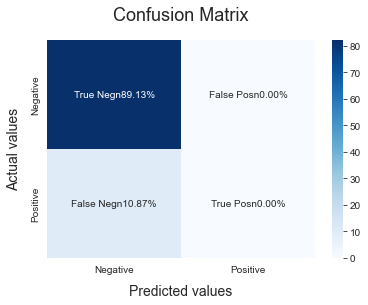

In [71]:
#Model: Logistic Regression using tdf-if
LRmodel = LogisticRegression(solver='liblinear',C = 2, max_iter = 100000,random_state=100000)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)
print('Our prediction of rating would be',y_pred3)

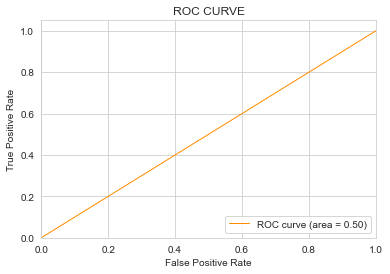

In [72]:
#Plot the ROC-AUC Curve for model with Linear regression of tf-idf
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [73]:
#creating array variable of all the words
feature_names_tf = np.array(vectoriser.get_feature_names())

#creating array of all the regression coefficients per word
coef_index_tf = LRmodel.coef_[0]

#creating dataframe with both arrays in it
df2 = pd.DataFrame({'Word':feature_names_tf, 'Coef': coef_index_tf})

#sorting by coefficient
df2.sort_values('Coef')

Word      Coef
9161            service -0.788665
11178               use -0.638397
1460               card -0.619252
6231              money -0.592091
2369   customer service -0.569064
...                 ...       ...
3464         every time  0.733711
2377          customers  0.951069
945             battery  0.978139
4396              great  1.050658
5735               love  1.336128

[12113 rows x 2 columns]

In [74]:
# Negative Word Sentiment Data frame

neg_tf = df2[df2.Coef < 0]
neg_tf.sort_values('Coef')

Word      Coef
9161            service -0.788665
11178               use -0.638397
1460               card -0.619252
6231              money -0.592091
2369   customer service -0.569064
...                 ...       ...
2755         distancing -0.005149
6138            minutes -0.004874
5107             issues -0.004796
5690            looking -0.004635
9493             social -0.002394

[10075 rows x 2 columns]

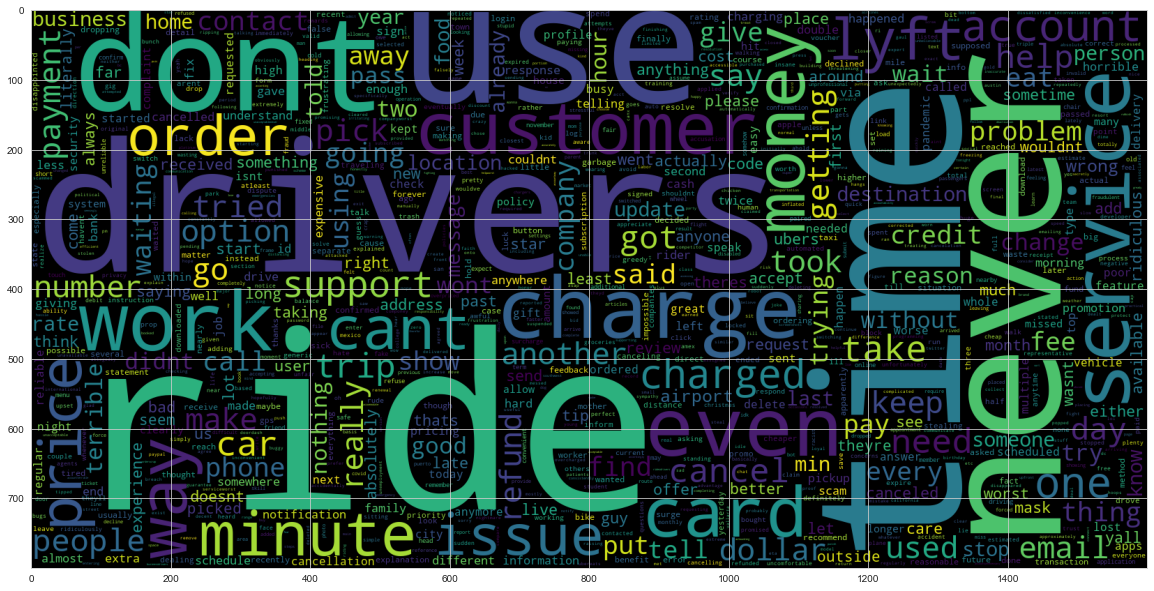

In [75]:
# Wordcloud for negative coefficient words

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(neg_tf.Word))
plt.imshow(wc)
plt.show()

In [76]:
# Positive Word Sentiment Data frame

pos_tf = df2[df2.Coef > 0]
pos_tf.sort_values('Coef', ascending=False)

Word      Coef
5735         love  1.336128
4396        great  1.050658
945       battery  0.978139
2377    customers  0.951069
3464   every time  0.733711
...           ...       ...
11899       works  0.007512
10114        taxi  0.005940
5718          lot  0.005760
11887     working  0.001677
5665       longer  0.000051

[2038 rows x 2 columns]

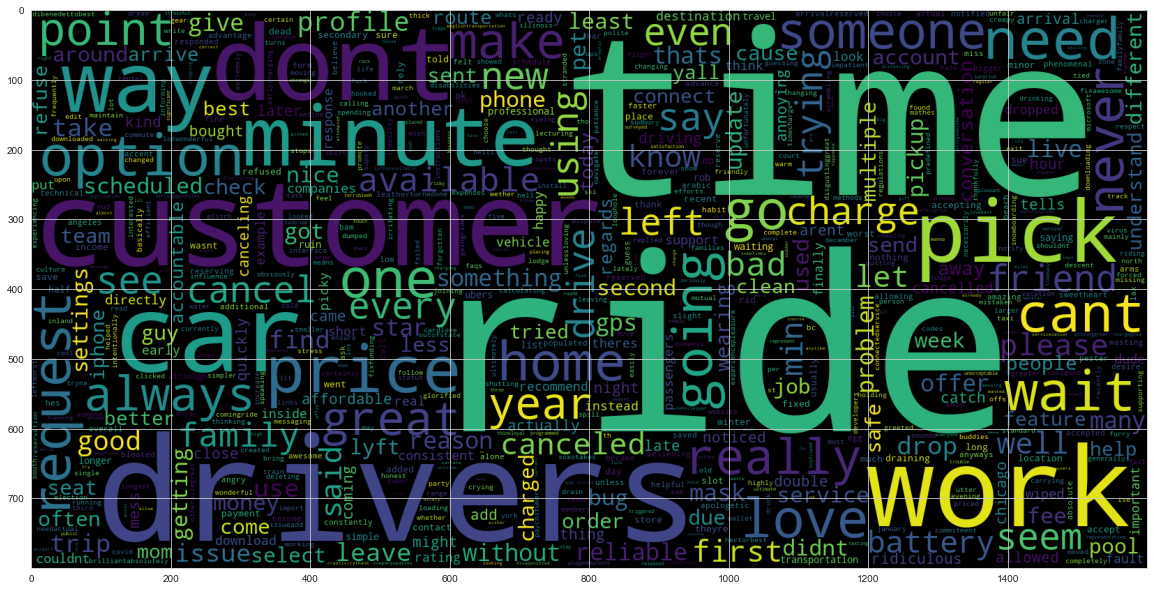

In [77]:
# Wordcloud for positive coefficient words

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(pos_tf.Word))
plt.imshow(wc)
plt.show()

# 

## Testing Custom Reviews by above model

In [78]:
print(model.predict(vect.transform(['arrive on time'])))
print(model.predict(vect.transform(['customer care'])))
print(model.predict(vect.transform(['charged slow horrible'])))
print(model.predict(vect.transform(['Yes accepting'])))

[0]
[0]
[0]
[0]


<hr style="border:2px solid gray">

## <font color=blue>Observations & Conclusion</font>

### 1. It has been observed that the AUC score is similar for both TF-IDF and Count Vectoriser model, i.e. 0.5. Also, another notable observation is that such low AUC score is pertaining to the fact that the input data is highly unbalanced. We could have used Oversampling to correct the data, but it is out of scope for now.

### 2. If we look at the bag-of-words derived from both models, the most negatively correlated words are 'Service', 'Card', 'Use' and 'Lyft' and if we look at most positive correlated words, we get words like 'Love & 'Great', 'customers', and a suprising heavy positive correlated word is 'Battery'.

### 3. Since, the negative sentiments are highly related to words like 'Service', that means the customer service of Uber is the biggest are of concern and our advice would be to train drivers in customer dealing to ensure the rider has a pleasant service experience. 

### 4. Also, words like 'card' and 'use' carry heavy negative sentiment, hence, we can assume that payments invoving cards are facing issue and also there some customers might be facing issue in using the application. Uber may look into further making application user friendly and also, have a improved payment gateway inorder to minimize card payment issues.

### 5. Another high negative correlated word is 'Lyft', which implies that customers giving negative reviews are comparing Uber with Lyft or shifting to Lyft. Which makes 'Lyft' as major competitior for Uber, and we might look into certain edge points which Lyft has over Uber and try improving Uber service in those particular areas.

### 6. Further, we noticed that as the rush hour reaches peak, that is on weekdays like Monday, the number of negative ratings increase. Uber needs to work out a strategy, to avoid heavy surcharge being applied during rush hour and also, ensure that ride aiting time is reduced during rush hour.

### 7. Word 'Battery, being highly positve correlated, may imply that the availability of Mobile battery chargers in cars is a plus point for customer satisfaction. Uber may look into giving certain facilities, that might enhance the customer ride experience, like a water bottle or can of soda, or cutomizable music playlists etc.

### These, small improvement points might help Uber increase its positive ratings and reviews, and counter close competitiors like Lyft.

<hr style="border:2px solid gray">

## <font color=blue>Streamlit App</font>

### We have also created a streamlit application and below is the basic architecture of the streamlit app.

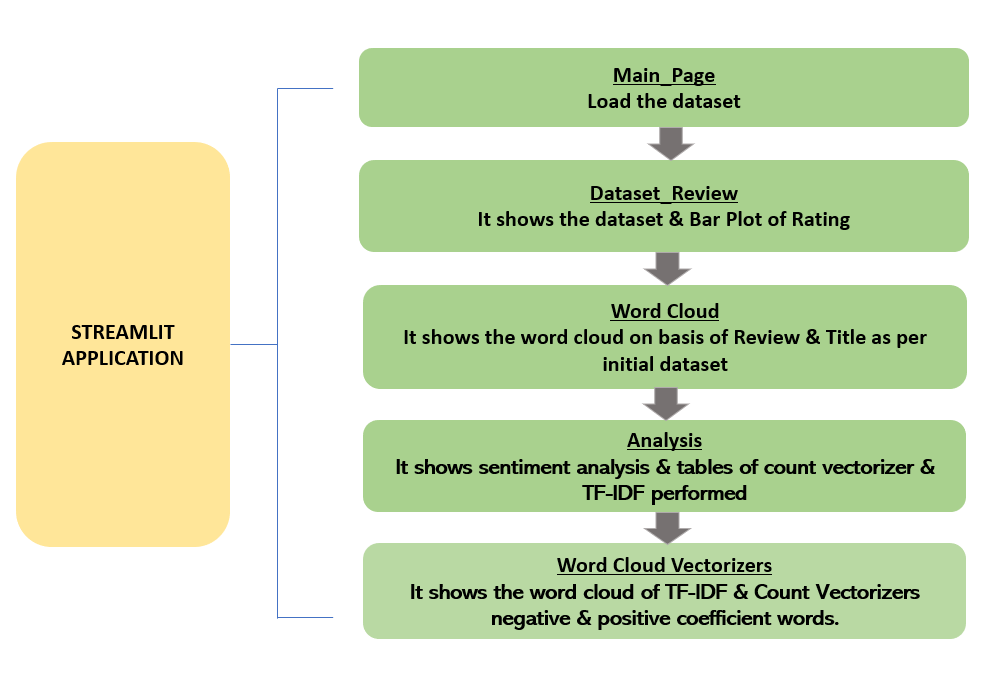

### In order to run the streamlit app, kindly follow below steps:
### 1. Save Main_page & Streamlit_app in default directory of Jupyter
### 2. Save Pages folder in default directory of Jupyter
### 3. Run the below command

In [79]:
!streamlit run C:\Users\jatin\main_page.py

^C


<hr style="border:2px solid gray">

## <font color=blue>References</font>

### 1. https://www.datacamp.com/tutorial/streamlit
### 2. https://realpython.com/logistic-regression-python/
### 3. https://www.analyticsvidhya.com/blog/2021/05/how-to-build-word-cloud-in-python/

<hr style="border:2px solid gray">